In [125]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# 1. Download the TMDataset from the website

In [42]:
!python download_dataset.py

DOWNLOAD........
DOWNLOAD ENDED.


Up to now the projects is structured as follows:
```unicode
.
├── TransportationDataWithoutNan
|   ├── datasetBalanced 
|         └── dataset_5secondWindow.csv
|         └── dataset_halfSecondWindow.csv
|   └── _RawDataOriginal (Extract all files in sub-folder of users to be 1 folder)
|         └── ...

## Understanding the data

In [65]:
'''
Check if there is NaN values
'''
file_path = 'TransportationData/_Dataset/dataset.csv'

# Read the CSV file
try:
    df = pd.read_csv(file_path)
    print(f"File: {file_path}")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("Column names:")
    print(df.columns.tolist())
    # for i in range(len(df.columns.tolist())):
    #     print(df.columns[i])
    # print("\nData types of columns:")
    # print(df.dtypes)

    # Summary of missing values
    missing_values = df.isnull().sum()
    print("\nSummary of missing values:")
    print(missing_values)
    
    # Calculate percentage of missing values
    missing_percentage = missing_values / df.shape[0] * 100
    print("\nPercentage of missing values in each column:")
    print(missing_percentage)
    
    # Identify columns with more than 45% missing values
    threshold = 45
    columns_to_drop = missing_percentage[missing_percentage > threshold].index
    print(f"\nColumns with more than {threshold}% missing values:")
    print(columns_to_drop)
    
except Exception as e:
    print(f"Error reading {file_path}: {e}")


File: TransportationData/_Dataset/dataset.csv
Number of rows: 24868
Number of columns: 69
Column names:
['time', 'activityrecognition#0', 'activityrecognition#1', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.magnetic_field_uncalibrated#mean', 'android.sensor.magnetic_field_uncalibrated#min', 'android.sensor.magnetic_field_uncalibrated#max', 'android.sensor.magnetic_field_uncalibrated#std', 'android.sensor.game_rotation_vector#mean', 'android.sensor.game_rotation_vector#min', 'android.sensor.game_rotation_vector#max', 'android.sensor.game_rotation_vector#std', 'android.sensor.orientation#mean', 'android.sensor.orientation#min', 'android.sensor.orientation#max', 'android.sensor.orientation#std', 'android.sensor.linear_acceleration#mean', 'android.sensor.linear_acceleration#min', 'android.sensor.linear_acceleration#max', 'android.sensor.linear_acceleration#std', 'android.sen

There are a lot of Nan values and missing data for several features. Therefore, we need to clean the data before using it.

# 2. Data Preprocessing
### Clean the raw data, extract the feature, and remove NaN (TMDatasteRemoveNan.py)

Up to now the projects is structured as follows:
```unicode
.
├── TransportationDataWithoutNan
|   ├── datasetBalanced (This dataset provided the window partitioning data files from the data source but I did the window partitioning by myself.)
|         └── dataset_5secondWindow.csv
|         └── dataset_halfSecondWindow.csv
|   └── _RawDataOriginal (Extract all files in sub-folder of users to be 1 folder)
|         └── ...
|   └── _RawDataCorrect
|   └── _RawDataTransform
|   └── _RawDataHeader
|   └── _RawDataFeatures
|   └── _Dataset

In [ ]:
!python TMDatasetRemoveNan.py

Check if there is NaN values

In [40]:
'''
Check if there is NaN values
'''
# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = 'TransportationDataWithoutNan/_Dataset/dataset.csv'

# Read the CSV file
try:
    df = pd.read_csv(file_path)
    print(f"File: {file_path}")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("Column names:")
    print(df.columns.tolist())
    # for i in range(len(df.columns.tolist())):
    #     print(df.columns[i])
    # print("\nData types of columns:")
    # print(df.dtypes)

    # Summary of missing values
    missing_values = df.isnull().sum()
    print("\nSummary of missing values:")
    print(missing_values)
    
    # Calculate percentage of missing values
    missing_percentage = missing_values / df.shape[0] * 100
    print("\nPercentage of missing values in each column:")
    print(missing_percentage)
    
    # Identify columns with more than 45% missing values
    threshold = 45
    columns_to_drop = missing_percentage[missing_percentage > threshold].index
    print(f"\nColumns with more than {threshold}% missing values:")
    print(columns_to_drop)
    
except Exception as e:
    print(f"Error reading {file_path}: {e}")


File: TransportationDataWithoutNan/_Dataset/dataset.csv
Number of rows: 24986
Number of columns: 47
Column names:
['time', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.magnetic_field_uncalibrated#mean', 'android.sensor.magnetic_field_uncalibrated#min', 'android.sensor.magnetic_field_uncalibrated#max', 'android.sensor.magnetic_field_uncalibrated#std', 'android.sensor.game_rotation_vector#mean', 'android.sensor.game_rotation_vector#min', 'android.sensor.game_rotation_vector#max', 'android.sensor.game_rotation_vector#std', 'android.sensor.orientation#mean', 'android.sensor.orientation#min', 'android.sensor.orientation#max', 'android.sensor.orientation#std', 'android.sensor.linear_acceleration#mean', 'android.sensor.linear_acceleration#min', 'android.sensor.linear_acceleration#max', 'android.sensor.linear_acceleration#std', 'android.sensor.rotation_vector#mean', 'android.sens

In [39]:
'''
Check if there is NaN values with specific user and percentage
'''

def find_users_with_nan_details(csv_file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)
    
    # Find rows with NaN values
    nan_rows = df[df.isna().any(axis=1)]
    
    # Get unique users who have NaN values in their data
    users_with_nan = nan_rows['user'].unique()
    
    # Initialize a dictionary to store the results
    nan_details = {}
    
    # Iterate over each user who has NaNs to calculate the percentage of NaNs per column
    for user in users_with_nan:
        user_data = df[df['user'] == user]
        nan_counts = user_data.isna().sum()
        total_counts = len(user_data)
        percentages = (nan_counts / total_counts) * 100
        nan_details[user] = percentages[percentages > 0].to_dict()  # Store only columns with NaNs

    return nan_details

csv_file_path = 'TransportationDataWithoutNan/_Dataset/dataset.csv'  # Replace this with your CSV file path
nan_details_by_user = find_users_with_nan_details(csv_file_path)
for user, details in nan_details_by_user.items():
    print(f"User: {user}")
    for column, percentage in details.items():
        print(f"  {column}: {percentage:.2f}% NaNs")


# 3. Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

sns.set(style="whitegrid")

In [59]:
from TMDatasetRemoveNan import TMDatasetRemoveNan
dataset = TMDatasetRemoveNan()
df = dataset.get_dataset

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24986 entries, 0 to 24985
Data columns (total 47 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   time                                             24986 non-null  int64  
 1   android.sensor.accelerometer#mean                24986 non-null  float64
 2   android.sensor.accelerometer#min                 24986 non-null  float64
 3   android.sensor.accelerometer#max                 24986 non-null  float64
 4   android.sensor.accelerometer#std                 24986 non-null  float64
 5   android.sensor.magnetic_field_uncalibrated#mean  24986 non-null  float64
 6   android.sensor.magnetic_field_uncalibrated#min   24986 non-null  float64
 7   android.sensor.magnetic_field_uncalibrated#max   24986 non-null  float64
 8   android.sensor.magnetic_field_uncalibrated#std   24986 non-null  float64
 9   android.sensor.game_rotation

In [49]:
# Check duplicate
df.duplicated().sum()

0

In [50]:
df.columns = df.columns.str.replace('android.sensor.','').str.replace('#','_')
df.head()

time  accelerometer_mean  accelerometer_min  accelerometer_max  \
0     0            9.905629           8.216526          11.321022   
1     1           10.100427           8.563149          12.474646   
2     2            9.868358           8.461351          12.211601   
3     3            9.713304           9.032533          11.862807   
4     4            9.975892           8.376049          13.037203   

   accelerometer_std  magnetic_field_uncalibrated_mean  \
0           0.419424                        300.234004   
1           0.865494                        304.134567   
2           0.632985                        302.296684   
3           0.538172                        302.296684   
4           0.633419                        300.064214   

   magnetic_field_uncalibrated_min  magnetic_field_uncalibrated_max  \
0                       300.234004                       300.234004   
1                       300.234004                       309.265328   
2                       302.296684                       302.296684   
3                       302.296684                       302.296684   
4                       297.360242                       302.296684   

   magnetic_field_uncalibrated_std  game_rotation_vector_mean  ...  \
0                     1.714446e-13                   0.404109  ...   
1                     3.662897e+00                   0.381344  ...   
2                     5.715489e-14                   0.519705  ...   
3                     0.000000e+00                   0.711650  ...   
4                     1.871695e+00                   0.711652  ...   

   magnetic_field_mean  magnetic_field_min  magnetic_field_max  \
0            43.032464           43.032464           43.032464   
1            42.825492           41.222244           44.769287   
2            41.222244           41.222244           41.222244   
3            41.222244           41.222244           41.222244   
4            41.222244           41.222244           41.222244   

   magnetic_field_std  sound_mean  sound_min  sound_max     sound_std  target  \
0        7.143526e-15   73.675345  73.675345  73.675345  1.428705e-14     Car   
1        1.538113e+00   73.675345  73.675345  73.675345  0.000000e+00     Car   
2        7.144361e-15   73.675345  73.675345  73.675345  1.428872e-14     Car   
3        7.143526e-15   73.675345  73.675345  73.675345  1.428705e-14     Car   
4        7.143526e-15   73.675345  73.675345  73.675345  1.428705e-14     Car   

   user  
0   U10  
1   U10  
2   U10  
3   U10  
4   U10  

[5 rows x 47 columns]

In [51]:
df.iloc[:,41:44]

sound_mean  sound_min  sound_max
0       73.675345  73.675345  73.675345
1       73.675345  73.675345  73.675345
2       73.675345  73.675345  73.675345
3       73.675345  73.675345  73.675345
4       73.675345  73.675345  73.675345
...           ...        ...        ...
24981    0.000000   0.000000   0.000000
24982    0.000000   0.000000   0.000000
24983    0.000000   0.000000   0.000000
24984    0.000000   0.000000   0.000000
24985    0.000000   0.000000   0.000000

[24986 rows x 3 columns]

### Density plots of sensor data showing statistical metrics (mean, min, max, std) for accelerometer, gyroscope, sound levels, and time distribution.

C:\Users\patta\AppData\Local\Temp\ipykernel_18720\1294334062.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:,0])
C:\Users\patta\AppData\Local\Temp\ipykernel_18720\1294334062.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:,i])
C:\Users\patta\AppData\Local\Temp\ipykern

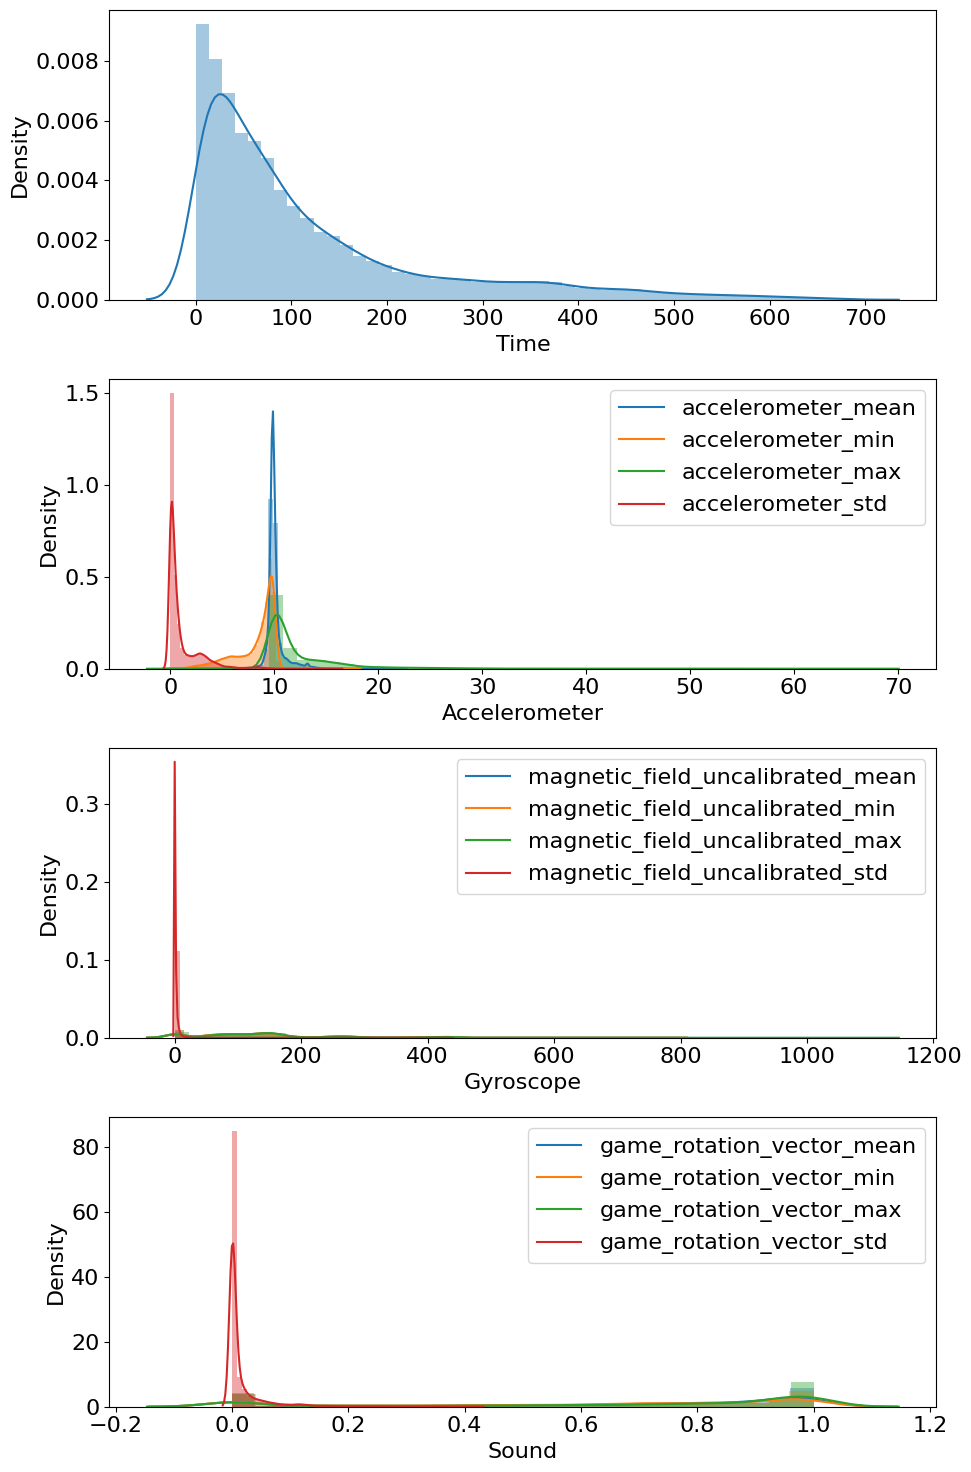

In [66]:
# Set the overall font size using rcParams
plt.rcParams.update({'font.size': 16}) 
plt.figure(figsize=(10,15))

plt.subplot(4,1,1)
sns.distplot(df.iloc[:,0])
plt.xlabel('Time')

plt.subplot(4,1,2)
for i in range(1,5):
    sns.distplot(df.iloc[:,i])
plt.legend(df.iloc[:,1:5].columns, fontsize=16)  
plt.xlabel('Accelerometer')

plt.subplot(4,1,3)
for i in range(5,9):
    sns.distplot(df.iloc[:,i])
plt.legend(df.iloc[:,5:9].columns, fontsize=16)  
plt.xlabel('Gyroscope')

plt.subplot(4,1,4)
for i in range(9,13):
    sns.distplot(df.iloc[:,i])
plt.legend(df.iloc[:,9:13].columns, fontsize=16)  
plt.xlabel('Sound')

plt.tight_layout() 
plt.show()

### Box Plot Analysis for Time, Accelerometer, Gyroscope, and Sound.

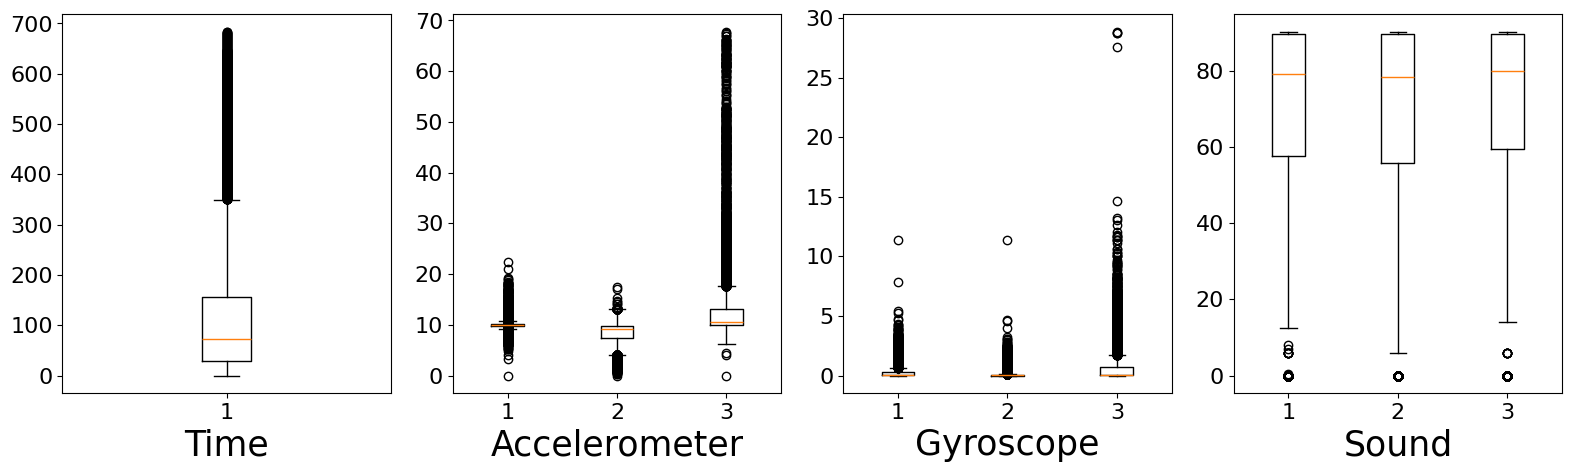

In [89]:
# Checking the values ​​of some variables using a boxplot
plt.figure(figsize=(16, 5))

# Time boxplot
plt.subplot(141)
plt.boxplot(df.iloc[:,0])
plt.xlabel('Time', fontsize=25) 

# Accelerometer boxplot
plt.subplot(142)
plt.boxplot([df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]])
plt.xlabel('Accelerometer', fontsize=25)

# Gyroscope boxplot
plt.subplot(143)
plt.boxplot([df.iloc[:,29], df.iloc[:,30], df.iloc[:,31]])
plt.xlabel('Gyroscope', fontsize=25)  

# Sound boxplot
plt.subplot(144)
plt.boxplot([df.iloc[:,41], df.iloc[:,42], df.iloc[:,43]])
plt.xlabel('Sound', fontsize=25) 

plt.tight_layout()  # Prevent overlap
plt.show()

### Bar charts represented the distribution across transportation modes.

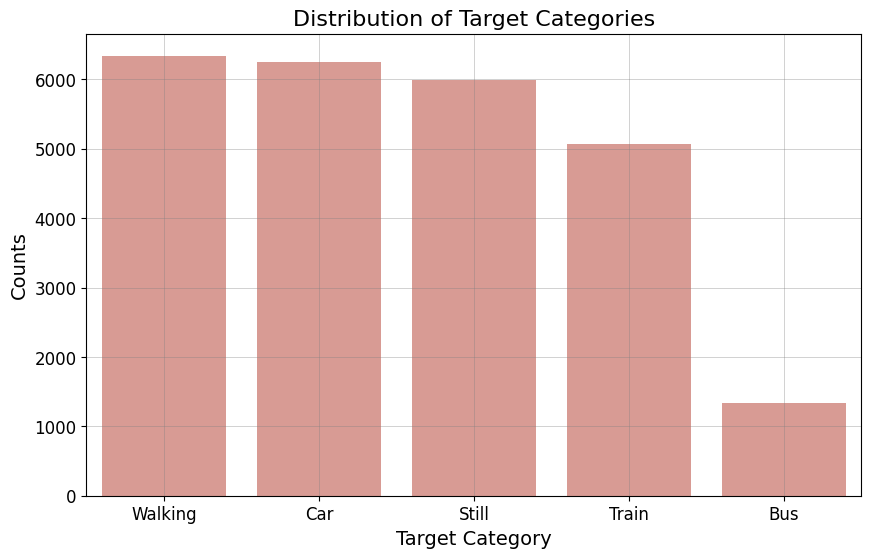

In [99]:
# Checking the representativeness of the target variable in the dataset
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df.target.value_counts().index,y=df.target.value_counts(),color="salmon",saturation=.5);

# Customize the plot to improve readability
ax.set_xlabel('Target Category', fontsize=14)  # Set x-axis label
ax.set_ylabel('Counts', fontsize=14)          # Set y-axis label 
ax.set_title('Distribution of Target Categories', fontsize=16)  # Set the title 
plt.xticks(fontsize=12)  # Set the font size for x-axis tick labels
plt.yticks(fontsize=12)  # Set the font size for y-axis tick labels
ax.grid(True, linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
plt.show()

### Correlation Matrix of Sensor Features in the Dataset.

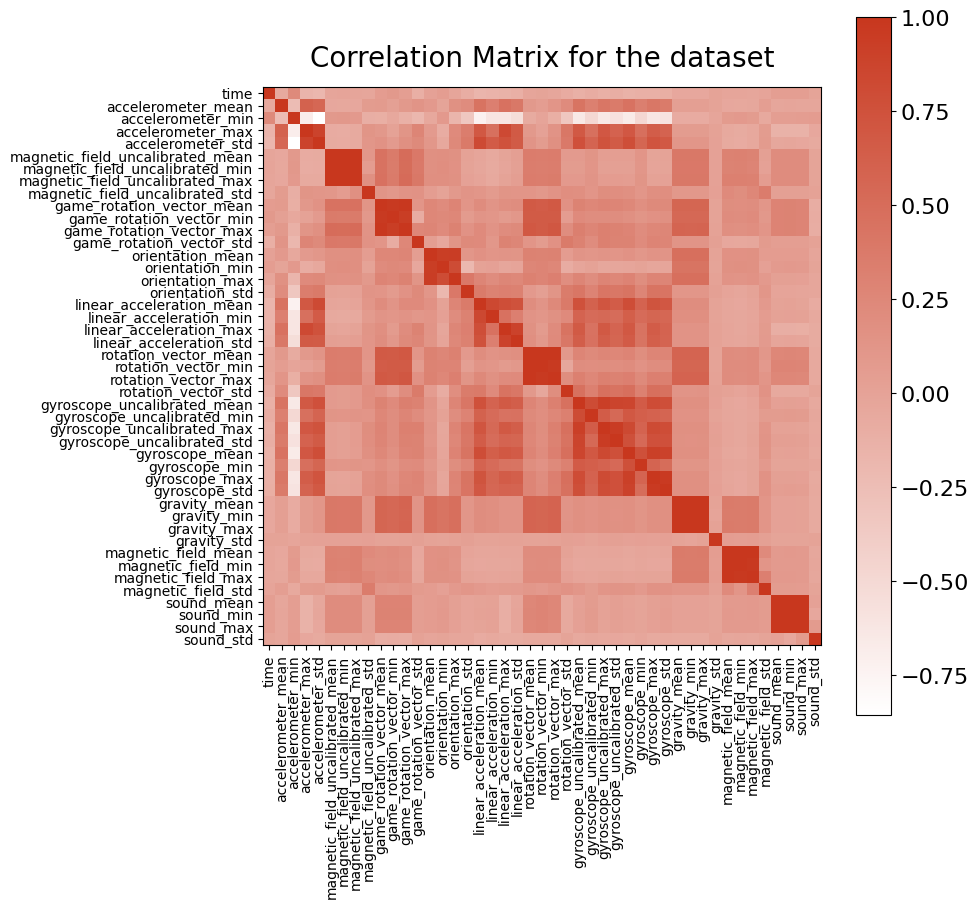

In [145]:
# Create a custom light red colormap
colors = ["#ffffff", "#C8371E"]
cmap_red = LinearSegmentedColormap.from_list("salmon_custom", colors)

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    # Convert categorical columns to numeric if necessary, or drop non-numeric columns
    numeric_df = df.select_dtypes(include=[np.number])  # Only keep numeric columns
    if numeric_df.empty:
        print('No numeric columns to display.')
        return

    # Proceed if there are at least two numeric columns to compare
    if len(numeric_df.columns) > 1:
        corr = numeric_df.corr()
        plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=100, facecolor='w', edgecolor='k')
        corrMat = plt.matshow(corr, fignum=1, cmap=cmap_red)
        plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=10)
        plt.yticks(range(len(corr.columns)), corr.columns, fontsize=10)
        plt.gca().xaxis.tick_bottom()
        plt.colorbar(corrMat)
        plt.title(f'Correlation Matrix for the dataset', fontsize=20, pad=15)
        plt.show()
    else:
        print('Not enough numeric columns to display correlation matrix.')

plotCorrelationMatrix(df, 9)

# 4. Building models

### Predict transportation mode and driver simultanously using MultiOutputClassifier and predict the individual tasks

To compare the performance of a multi-task model against individual models for each task, we run the MTL models with the individual Neural Network models using the same cross-validation dataset to compare their performances. This will allow us to assess whether the multi-task approach indeed provides benefits over handling each task independently.

In [2]:
import time
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from TMDatasetRemoveNan import TMDatasetRemoveNan
from tensorflow.keras.metrics import Precision, Recall

# Load the dataset
def load_data():
    dataset = TMDatasetRemoveNan()
    df = dataset.get_dataset
    return df

df = load_data()
X = df.drop(columns=['target', 'user'])
y_target = df['target']
y_user = df['user']

target_encoder = LabelEncoder()
user_encoder = LabelEncoder()
y_target_encoded = target_encoder.fit_transform(y_target)
y_user_encoded = user_encoder.fit_transform(y_user)

y_target_categorical = to_categorical(y_target_encoded)
y_user_categorical = to_categorical(y_user_encoded)

def create_target_model(input_shape, num_classes):
    input_layer = Input(shape=(input_shape,))
    x = Dense(128, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax', name='target_output')(x)
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', Precision(), Recall()])
    return model

def create_user_model(input_shape, num_classes):
    input_layer = Input(shape=(input_shape,))
    x = Dense(128, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax', name='user_output')(x)
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', Precision(), Recall()])
    return model

def create_multi_task_model(input_shape, num_target_classes, num_user_classes):
    input_layer = Input(shape=(input_shape,))
    shared = Dense(128, activation='relu')(input_layer)
    shared = BatchNormalization()(shared)
    shared = Activation('relu')(shared)
    shared = Dropout(0.5)(shared)
    target_output = Dense(num_target_classes, activation='softmax', name='target_output')(shared)
    user_output = Dense(num_user_classes, activation='softmax', name='user_output')(shared)
    model = Model(inputs=input_layer, outputs=[target_output, user_output])
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss={'target_output': 'categorical_crossentropy', 'user_output': 'categorical_crossentropy'}, 
                  metrics=['accuracy', Precision(), Recall()])
    return model

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
multi_task_scores = []
individual_target_scores = []
individual_user_scores = []
multi_task_times = []
target_model_times = []
user_model_times = []

for train, test in kfold.split(X, y_target_encoded):
    # Multi-task model
    start_time = time.time()
    multi_task_model = create_multi_task_model(X.shape[1], y_target_categorical.shape[1], y_user_categorical.shape[1])
    multi_task_model.fit(X.iloc[train], {'target_output': y_target_categorical[train], 'user_output': y_user_categorical[train]},
                        validation_data=(X.iloc[test], {'target_output': y_target_categorical[test], 'user_output': y_user_categorical[test]}),
                        epochs=30, batch_size=64)
    multi_task_times.append(time.time() - start_time)
    scores_multi = multi_task_model.evaluate(X.iloc[test], {'target_output': y_target_categorical[test], 'user_output': y_user_categorical[test]})
    multi_task_scores.append(scores_multi)

    # Individual target model
    start_time = time.time()
    target_model = create_target_model(X.shape[1], y_target_categorical.shape[1])
    target_model.fit(X.iloc[train], y_target_categorical[train], validation_data=(X.iloc[test], y_target_categorical[test]), epochs=30, batch_size=64)
    target_model_times.append(time.time() - start_time)
    scores_target = target_model.evaluate(X.iloc[test], y_target_categorical[test])
    individual_target_scores.append(scores_target)

    # Individual user model
    start_time = time.time()
    user_model = create_user_model(X.shape[1], y_user_categorical.shape[1])
    user_model.fit(X.iloc[train], y_user_categorical[train], validation_data=(X.iloc[test], y_user_categorical[test]), epochs=30, batch_size=64)
    user_model_times.append(time.time() - start_time)
    scores_user = user_model.evaluate(X.iloc[test], y_user_categorical[test])
    individual_user_scores.append(scores_user)

# Summary statistics for comparison
average_multi_task = np.mean(multi_task_scores, axis=0)
std_dev_multi_task = np.std(multi_task_scores, axis=0)

average_target = np.mean(individual_target_scores, axis=0)
std_dev_target = np.std(individual_target_scores, axis=0)

average_user = np.mean(individual_user_scores, axis=0)
std_dev_user = np.std(individual_user_scores, axis=0)

print("========== Results ==========")

print("\nMulti-task model average scores (mode and user):", average_multi_task[3], average_multi_task[6])
print("Multi-task model mode precision:", average_multi_task[4])
print("Multi-task model mode recall:", average_multi_task[5])
print("Multi-task model user precision:", average_multi_task[7])
print("Multi-task model user recall:", average_multi_task[8])
print("Multi-task model overall loss:", average_multi_task[0])
print("Multi-task model mode loss:", average_multi_task[1])
print("Multi-task model user loss:", average_multi_task[2])
print("Multi-task model std deviation:", std_dev_multi_task)

print("\nIndividual mode model average scores:", average_target[1])
print("Individual mode model precision:", average_target[2])
print("Individual mode model recall:", average_target[3])
print("Individual mode model loss:", average_target[0])
print("Individual mode model std deviation:", std_dev_target)

print("\nIndividual user model average scores:", average_user[1])
print("Individual user model precision:", average_user[2])
print("Individual user model recall:", average_user[3])
print("Individual user model loss:", average_user[0])
print("Multi-task model std deviation:", std_dev_user)

# Calculate average training times
avg_multi_task_time = np.mean(multi_task_times)
avg_target_model_time = np.mean(target_model_times)
avg_user_model_time = np.mean(user_model_times)
print("\n========== Computation Time ==========")
print("\nAverage training time for Multi-task model:", avg_multi_task_time, "seconds")
print("Average training time for Target model:", avg_target_model_time, "seconds")
print("Average training time for User model:", avg_user_model_time, "seconds")

Epoch 1/30
313/313 [==============================] - 2s 3ms/step - loss: 2.9794 - target_output_loss: 1.3649 - user_output_loss: 1.6145 - target_output_accuracy: 0.4690 - target_output_precision_15: 0.5909 - target_output_recall_15: 0.2735 - user_output_accuracy: 0.5475 - user_output_precision_15: 0.7255 - user_output_recall_15: 0.3383 - val_loss: 1.9370 - val_target_output_loss: 0.9951 - val_user_output_loss: 0.9419 - val_target_output_accuracy: 0.6581 - val_target_output_precision_15: 0.7611 - val_target_output_recall_15: 0.3952 - val_user_output_accuracy: 0.6939 - val_user_output_precision_15: 0.8126 - val_user_output_recall_15: 0.6028
Epoch 2/30
313/313 [==============================] - 1s 2ms/step - loss: 1.9275 - target_output_loss: 0.9722 - user_output_loss: 0.9553 - target_output_accuracy: 0.6262 - target_output_precision_15: 0.7546 - target_output_recall_15: 0.4510 - user_output_accuracy: 0.6886 - user_output_precision_15: 0.8114 - user_output_recall_15: 0.5587 - val_loss: 1

In [50]:
print(multi_task_model.metrics_names)
print(target_model.metrics_names)
print(user_model.metrics_names)

['loss', 'target_output_loss', 'user_output_loss', 'target_output_accuracy', 'target_output_precision_12', 'target_output_recall_12', 'user_output_accuracy', 'user_output_precision_12', 'user_output_recall_12']
['loss', 'accuracy', 'precision_13', 'recall_13']
['loss', 'accuracy', 'precision_14', 'recall_14']


### Experiments with different learning rates, epochs, batch sizes, and dropout rates.
To incorporate separate training of the target and user models using the same hyperparameters as the multi-task model for comparative analysis

In [24]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from TMDatasetRemoveNan import TMDatasetRemoveNan

# Load the dataset
def load_data():
    dataset = TMDatasetRemoveNan()
    df = dataset.get_dataset
    return df

df = load_data()
X = df.drop(columns=['target', 'user'])
y_target = df['target']
y_user = df['user']

target_encoder = LabelEncoder()
user_encoder = LabelEncoder()
y_target_encoded = target_encoder.fit_transform(y_target)
y_user_encoded = user_encoder.fit_transform(y_user)

y_target_categorical = to_categorical(y_target_encoded)
y_user_categorical = to_categorical(y_user_encoded)

# Hyperparameters
learning_rates = [0.0005, 0.0001]
epochs_list = [30, 50]
batch_sizes = [64, 128]
dropout_rates = [0.5, 0.7]

# Define model creation functions
def create_target_model(input_shape, num_classes, dropout_rate, lr):
    input_layer = Input(shape=(input_shape,))
    x = Dense(128, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)
    output = Dense(num_classes, activation='softmax', name='target_output')(x)
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=lr), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', Precision(), Recall()])
    return model

def create_user_model(input_shape, num_classes, dropout_rate, lr):
    input_layer = Input(shape=(input_shape,))
    x = Dense(128, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)
    output = Dense(num_classes, activation='softmax', name='user_output')(x)
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=lr), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', Precision(), Recall()])
    return model

def create_multi_task_model(input_shape, num_target_classes, num_user_classes, dropout_rate, lr):
    input_layer = Input(shape=(input_shape,))
    shared = Dense(128, activation='relu')(input_layer)
    shared = BatchNormalization()(shared)
    shared = Activation('relu')(shared)
    shared = Dropout(dropout_rate)(shared)
    target_output = Dense(num_target_classes, activation='softmax', name='target_output')(shared)
    user_output = Dense(num_user_classes, activation='softmax', name='user_output')(shared)
    model = Model(inputs=input_layer, outputs=[target_output, user_output])
    model.compile(optimizer=Adam(learning_rate=lr), 
                  loss={'target_output': 'categorical_crossentropy', 'user_output': 'categorical_crossentropy'},
                  metrics=['accuracy', Precision(), Recall()])
    return model

# K-fold cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_results = []

for lr in learning_rates:
    for epochs in epochs_list:
        for batch_size in batch_sizes:
            for dropout_rate in dropout_rates:
                multi_task_scores, target_scores, user_scores = [], [], []
                multi_task_times, target_times, user_times = [], [], []
                
                for train, test in kfold.split(X, y_target_encoded):
                    # Multi-task model
                    print(f"Training with LR: {lr}, Epochs: {epochs}, Batch Size: {batch_size}, Dropout: {dropout_rate}")
                    multi_task_model = create_multi_task_model(X.shape[1], y_target_categorical.shape[1], y_user_categorical.shape[1], dropout_rate, lr)
                    start_time = time.time()
                    multi_task_model.fit(X.iloc[train], {'target_output': y_target_categorical[train], 'user_output': y_user_categorical[train]},
                                         validation_data=(X.iloc[test], {'target_output': y_target_categorical[test], 'user_output': y_user_categorical[test]}),
                                         epochs=epochs, batch_size=batch_size)
                    multi_task_times.append(time.time() - start_time)
                    multi_task_scores.append(multi_task_model.evaluate(X.iloc[test], {'target_output': y_target_categorical[test], 'user_output': y_user_categorical[test]}))
                    
                    # Target model
                    target_model = create_target_model(X.shape[1], y_target_categorical.shape[1], dropout_rate, lr)
                    start_time = time.time()
                    target_model.fit(X.iloc[train], y_target_categorical[train], validation_data=(X.iloc[test], y_target_categorical[test]), epochs=epochs, batch_size=batch_size)
                    target_times.append(time.time() - start_time)
                    target_scores.append(target_model.evaluate(X.iloc[test], y_target_categorical[test]))
                    
                    # User model
                    user_model = create_user_model(X.shape[1], y_user_categorical.shape[1], dropout_rate, lr)
                    start_time = time.time()
                    user_model.fit(X.iloc[train], y_user_categorical[train], validation_data=(X.iloc[test], y_user_categorical[test]), epochs=epochs, batch_size=batch_size)
                    user_times.append(time.time() - start_time)
                    user_scores.append(user_model.evaluate(X.iloc[test], y_user_categorical[test]))
                
                # Store results
                all_results.append({
                    "configuration": f"LR={lr}, Epochs={epochs}, Batch={batch_size}, Dropout={dropout_rate}",
                    "multi_task": {"scores": multi_task_scores, "time": np.mean(multi_task_times)},
                    "target": {"scores": target_scores, "time": np.mean(target_times)},
                    "user": {"scores": user_scores, "time": np.mean(user_times)}
                })

Training with LR: 0.0005, Epochs: 30, Batch Size: 64, Dropout: 0.5
Epoch 1/30
313/313 [==============================] - 2s 3ms/step - loss: 3.5615 - target_output_loss: 1.5845 - user_output_loss: 1.9771 - target_output_accuracy: 0.3895 - target_output_precision_451: 0.4831 - target_output_recall_451: 0.1972 - user_output_accuracy: 0.4558 - user_output_precision_451: 0.6267 - user_output_recall_451: 0.2138 - val_loss: 2.2355 - val_target_output_loss: 1.1303 - val_user_output_loss: 1.1052 - val_target_output_accuracy: 0.5452 - val_target_output_precision_451: 0.7132 - val_target_output_recall_451: 0.2895 - val_user_output_accuracy: 0.6551 - val_user_output_precision_451: 0.8195 - val_user_output_recall_451: 0.4652
Epoch 2/30
313/313 [==============================] - 1s 2ms/step - loss: 2.3407 - target_output_loss: 1.1718 - user_output_loss: 1.1689 - target_output_accuracy: 0.5382 - target_output_precision_451: 0.6867 - target_output_recall_451: 0.3536 - user_output_accuracy: 0.6378 - u

# 5. Getting the results

In [30]:
def print_all_results(all_results):
    for result in all_results:
        config = result["configuration"]
        print(f"\nConfiguration: {config}")

        # Multi-task Model Results
        multi_task_scores = np.array(result['multi_task']['scores'])
        multi_task_average = np.mean(multi_task_scores, axis=0)
        multi_task_std = np.std(multi_task_scores, axis=0)

        print("\nMulti-task model average scores (mode and user):", multi_task_average[3], multi_task_average[6])
        print("Multi-task model mode precision:", multi_task_average[4])
        print("Multi-task model mode recall:", multi_task_average[5])
        print("Multi-task model user precision:", multi_task_average[7])
        print("Multi-task model user recall:", multi_task_average[8])
        print("Multi-task model overall loss:", multi_task_average[0])
        print("Multi-task model mode loss:", multi_task_average[1])
        print("Multi-task model user loss:", multi_task_average[2])
        print("Multi-task model std deviation:", multi_task_std)

        # Target Model Results
        target_scores = np.array(result['target']['scores'])
        target_average = np.mean(target_scores, axis=0)
        target_std = np.std(target_scores, axis=0)

        print("\nIndividual mode model average scores:", target_average[1])
        print("Individual mode model precision:", target_average[2])
        print("Individual mode model recall:", target_average[3])
        print("Individual mode model loss:", target_average[0])
        print("Individual mode model std deviation:", target_std)

        # User Model Results
        user_scores = np.array(result['user']['scores'])
        user_average = np.mean(user_scores, axis=0)
        user_std = np.std(user_scores, axis=0)

        print("\nIndividual user model average scores:", user_average[1])
        print("Individual user model precision:", user_average[2])
        print("Individual user model recall:", user_average[3])
        print("Individual user model loss:", user_average[0])
        print("Individual user model std deviation:", user_std)

        # Training times
        print("\n========== Computation Time ==========")
        print("Average training time for Multi-task model:", result['multi_task']['time'], "seconds")
        print("Average training time for Target model:", result['target']['time'], "seconds")
        print("Average training time for User model:", result['user']['time'], "seconds")


In [38]:
# Call the function to print results
print_all_results(all_results)


Configuration: LR=0.0005, Epochs=30, Batch=64, Dropout=0.5

Multi-task model average scores (mode and user): 0.8516368985176086 0.911950433254242
Multi-task model mode precision: 0.9038277864456177
Multi-task model mode recall: 0.790642523765564
Multi-task model user precision: 0.9354509472846985
Multi-task model user recall: 0.8824939012527466
Multi-task model overall loss: 0.7379148244857788
Multi-task model mode loss: 0.4778116583824158
Multi-task model user loss: 0.26010310351848603
Multi-task model std deviation: [0.0170698  0.01518873 0.00893245 0.00589836 0.0058049  0.01506104
 0.00457166 0.00622895 0.00586799]

Individual mode model average scores: 0.856159257888794
Individual mode model precision: 0.898806345462799
Individual mode model recall: 0.8026896834373474
Individual mode model loss: 0.4556739866733551
Individual mode model std deviation: [0.00994588 0.00611523 0.00535683 0.00933904]

Individual user model average scores: 0.9281594038009644
Individual user model precis